<a href="https://colab.research.google.com/github/Sejalmali/technohacks/blob/main/missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# Read the dataset
df = pd.read_csv('gender_submission.csv')

In [16]:
df.dropna(inplace=True)

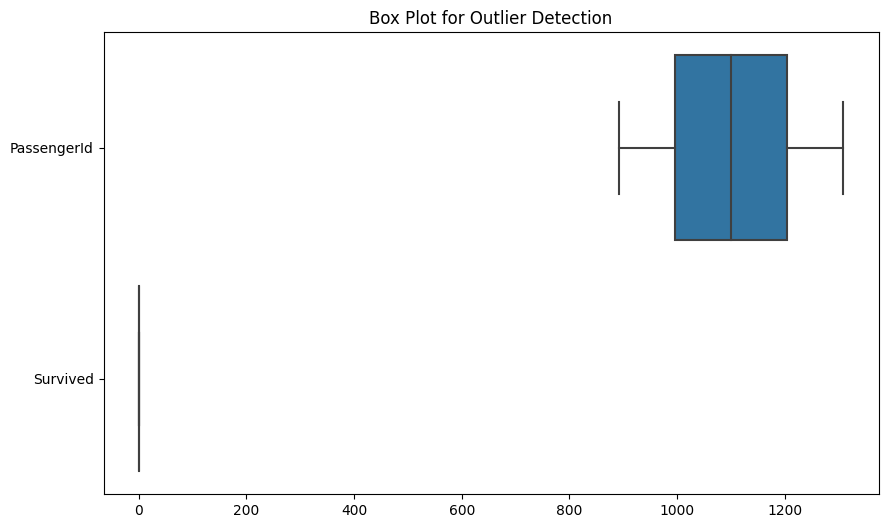

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['PassengerId', 'Survived']], orient="h")
plt.title('Box Plot for Outlier Detection')
plt.show()

In [35]:
Q1_PassengerId = df['PassengerId'].quantile(0.25)
Q3_PassengerId = df['PassengerId'].quantile(0.75)
IQR_PassengerId = Q3_PassengerId - Q1_PassengerId

In [36]:
Q1_Survived = df['Survived'].quantile(0.25)
Q3_Survived = df['Survived'].quantile(0.75)
IQR_Survived = Q3_Survived - Q1_Survived

In [38]:
lower_bound_PassengerId = Q1_PassengerId - 1.5 * IQR_PassengerId
upper_bound_PassengerId = Q3_PassengerId + 1.5 * IQR_PassengerId

In [39]:
lower_bound_Survived = Q1_Survived - 1.5 * IQR_Survived
upper_bound_Survived = Q3_Survived + 1.5 * IQR_Survived


In [41]:
df = df[
    (df['PassengerId'] >= lower_bound_PassengerId) &
    (df['PassengerId'] <= upper_bound_PassengerId) &
    (df['Survived'] >= lower_bound_Survived) &
    (df['Survived'] <= upper_bound_Survived)
]

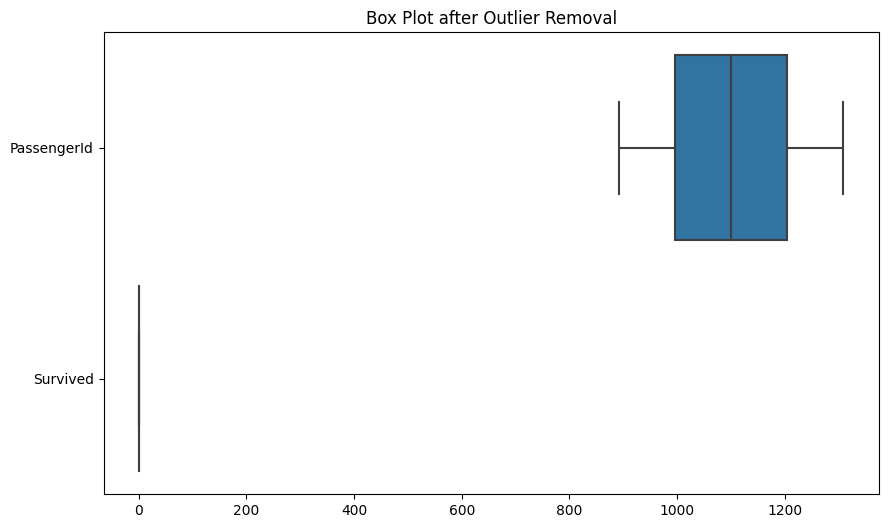

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['PassengerId', 'Survived']], orient="h")
plt.title('Box Plot after Outlier Removal')
plt.show()